# 5 Metrics for Binary Classification

Binary classification is arguably the most common and conceptually simple application of machine learning in practice. However, there are still a number of caveats in evaluating even this simple task. Before we dive into alternative metrics, let’s have a look at the ways in which measuring accuracy might be misleading. Remember that for binary classification, we often speak of a positive class and a negative class, with the understanding that the positive class is the one we are looking for.

# Kinds of errors

Often, accuracy is not a good measure of predictive performance, as the number of mistakes we make does not contain all the information we are interested in. Imagine an application to screen for the early detection of cancer using an automated test. If the test is negative, the patient will be assumed healthy, while if the test is positive, the patient will undergo additional screening. Here, we would call a positive test (an indication of cancer) the positive class, and a negative test the negative class. We can’t assume that our model will always work perfectly, and it will make mistakes. For any application, we need to ask ourselves what the consequences of these mistakes might be in the real world. 

One possible mistake is that a healthy patient will be classified as positive, leading to additional testing. This leads to some costs and an inconvenience for the patient (and possibly some mental distress). An incorrect positive prediction is called a false positive. The other possible mistake is that a sick patient will be classified as negative, and will not receive further tests and treatment. The undiagnosed cancer might lead to serious health issues, and could even be fatal. A mistake of this kind—an incorrect negative prediction—is called a false negative. In statistics, a false positive is also known as type I error, and a false negative as type II error. We will stick to “false negative” and “false positive,” as they are more explicit and easier to remember. In the cancer diagnosis example, it is clear that we want to avoid false negatives as much as possible, while false positives can be viewed as more of a minor nuisance.

While this is a particularly drastic example, the consequence of false positives and false negatives are rarely the same. In commercial applications, it might be possible to assign dollar values to both kinds of mistakes, which would allow measuring the error of a particular prediction in dollars, instead of accuracy. This might be much more meaningful for making business decisions on which model to use.

# Imbalanced datasets

Types of errors play an important role when one of two classes is much more frequent than the other one. This is very common in practice; a good example is click-through prediction, where each data point represents an “impression,” an item that was shown to a user. This item might be an ad, or a related story, or a related person to follow on a social media site. The goal is to predict whether, if shown a particular item, a user will click on it (indicating they are interested). Most things users are shown on the Internet (in particular, ads) will not result in a click. You might need to show a user 100 ads or articles before they find something interesting enough to click on. This results in a dataset where for each 99 “no click” data points, there is 1 “clicked” data point; in other words, 99% of the samples belong to the “no click” class. Datasets in which one class is much more frequent than the other are often called imbalanced datasets, or datasets with imbalanced classes. In reality, imbalanced data is the norm, and it is rare that the events of interest have equal or even similar frequency in the data.

Now let’s say you build a classifier that is 99% accurate on the click prediction task. What does that tell you? 99% accuracy sounds impressive, but this doesn’t take the class imbalance into account. You can achieve 99% accuracy without building a machine learning model, by always predicting “no click.” On the other hand, even with imbalanced data, a 99% accurate model could in fact be quite good. However, accuracy doesn’t allow us to distinguish the constant “no click” model from a potentially good model.

In [13]:
#To illustrate, we’ll create a 9:1 imbalanced dataset from the digits,
#by classify the digit against the nine other classes

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits=load_digits()
y=digits.target==9

X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=0)

We can use the DummyClassifier to always predict the majority class (here “not nine”) to see how uninformative accuracy can be:


In [14]:
from sklearn.dummy import DummyClassifier
import numpy as np
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test) 
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


We obtained close to 90% accuracy without learning anything. This might seem striking, but think about it for a minute. Imagine someone telling you their model is 90% accurate. You might think they did a very good job. But depending on the problem, that might be possible by just predicting one class! Let’s compare this against using an actual classifier:


In [15]:
#  Let’s compare this against using an actual classifier:

from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
pred_tree=tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test,y_test)))

Test score: 0.92


According to accuracy, the DecisionTreeClassifier is only slightly better than the constant predictor. This could indicate either that something is wrong with how we used DecisionTreeClassifier, or that accuracy is in fact not a good measure here.

For comparison purposes, let’s evaluate two more classifiers, LogisticRegression and the default DummyClassifier, which makes random predictions but produces classes with the same proportions as in the training set:

In [16]:
from sklearn.linear_model import LogisticRegression

dummy=DummyClassifier().fit(X_train,y_train)
pred_dummy=dummy.predict(X_test)
print("Dummy score: {:.2f}".format(dummy.score(X_test,y_test)))

logreg=LogisticRegression(C=0.1).fit(X_train,y_train)
pred_logreg=logreg.predict(X_test)
print("Logreg score: {:.2f}".format(logreg.score(X_test,y_test)))

Dummy score: 0.80
Logreg score: 0.98


The dummy classifier that produces random output is clearly the worst of the lot (according to accuracy), while LogisticRegression produces very good results.


# Confusion Matrics

One of the most comprehensive ways to represent the result of evaluating binary classification is using confusion matrices. Let’s inspect the predictions of LogisticRegres sion from the previous section using the confusion_matrix function. We already stored the predictions on the test set in pred_logreg:


Confusion matrix:
[[401   2]
 [  8  39]]


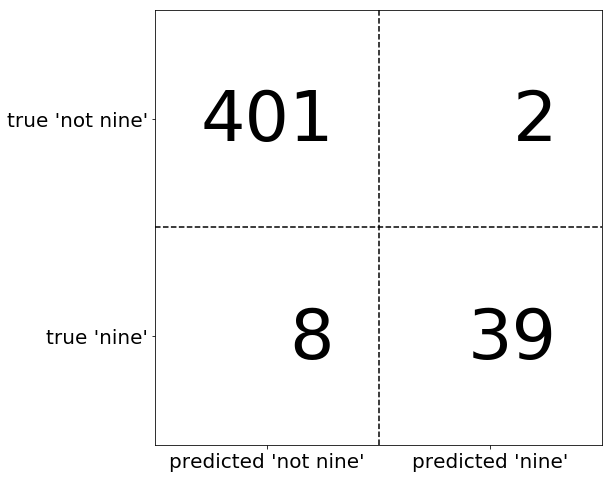

In [20]:
from sklearn.metrics import confusion_matrix
import mglearn

confusion=confusion_matrix(y_test,pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

mglearn.plots.plot_confusion_matrix_illustration()

 Confusion matrix of the “nine vs. rest” classification task


Entries on the main diagonal of the confusion matrix correspond to correct classifications, while other entries tell us how many samples of one class got mistakenly classified as another class. 

If we declare “a nine” the positive class, we can relate the entries of the confusion matrix with the terms false positive and false negative that we introduced earlier. To complete the picture, we call correctly classified samples belonging to the positive class true positives and correctly classified samples belonging to the negative class true negatives. These terms are usually abbreviated FP, FN, TP, and TN and lead to the following interpretation for the confusion matrix 

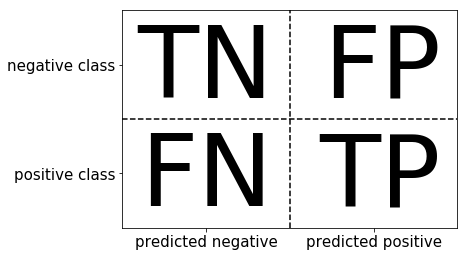

In [18]:
# Confusion matrix for binary classification
mglearn.plots.plot_binary_confusion_matrix()

In [21]:
print("Most frequent class:")
print(confusion_matrix(y_test,pred_most_frequent))

print("\n Dummy model:")
print(confusion_matrix(y_test,pred_dummy))

print("\nDecision tree:")
print(confusion_matrix(y_test,pred_tree))

print("\nLogistic Regression")
print(confusion_matrix(y_test,pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

 Dummy model:
[[367  36]
 [ 44   3]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  8  39]]


Looking at the confusion matrix, it is quite clear that something is wrong with pred_most_frequent, because it always predicts the same class. pred_dummy, on the other hand, has a very small number of true positives (4), particularly compared to the number of false negatives and false positives—there are many more false positives than true positives! The predictions made by the decision tree make much more sense than the dummy predictions, even though the accuracy was nearly the same. Finally, we can see that logistic regression does better than pred_tree in all aspects: it has more true positives and true negatives while having fewer false positives and false negatives. From this comparison, it is clear that only the decision tree and the logistic regression give reasonable results, and that the logistic regression works better than the tree on all accounts. However, inspecting the full confusion matrix is a bit cumbersome, and while we gained a lot of insight from looking at all aspects of the matrix, the process was very manual and qualitative. There are several ways to summarize the information in the confusion matrix, which we will discuss next. 

# Relation to accuracy:

 We already saw one way to summarize the result in the confusion matrix—by computing accuracy, which can be expressed as: 
 
 Accuracy = (TP+TN)/(TP+TN+FP+FN)
 
 In other words, accuracy is the number of correct predictions (TP and TN) divided by the number of all samples (all entries of the confusion matrix summed up).
 

# Precision , recall and f-score
There are several other ways to summarize the confusion matrix, with the most common ones being precision and recall.
    Precision measures how many of the samples predicted as positive are actually positive:

# Precision = TP/(TP+FP)

Precision is used as a performance metric when the goal is to limit the number of false positives. As an example, imagine a model for predicting whether a new drug will be effective in treating a disease in clinical trials. Clinical trials are notoriously expensive, and a pharmaceutical company will only want to run an experiment if it is very sure that the drug will actually work. Therefore, it is important that the model does not produce many false positives—in other words, that it has a high precision. Precision is also known as positive predictive value (PPV). 

Recall, on the other hand, measures how many of the positive samples are captured by the positive predictions: 

# Recall = TP/(TP+FN)

Recall is used as performance metric when we need to identify all positive samples; that is, when it is important to avoid false negatives. The cancer diagnosis example from earlier in this chapter is a good example for this: it is important to find all people that are sick, possibly including healthy patients in the prediction. Other names for recall are sensitivity, hit rate, or true positive rate (TPR). 

There is a trade-off between optimizing recall and optimizing precision. You can trivially obtain a perfect recall if you predict all samples to belong to the positive class— there will be no false negatives, and no true negatives either. However, predicting all samples as positive will result in many false positives, and therefore the precision will be very low. On the other hand, if you find a model that predicts only the single data point it is most sure about as positive and the rest as negative, then precision will be perfect (assuming this data point is in fact positive), but recall will be very bad.

    Precision and recall are only two of many classification measures
    derived from TP, FP, TN, and FN. You can find a great summary of all the measures on Wikipedia. In the machine learning community, precision and recall are arguably the most commonly used measures for binary 
    classification, but other communities might use other related metrics.
   
So, while precision and recall are very important measures, looking at only one of them will not provide you with the full picture. One way to summarize them is the f-score or f-measure, which is with the harmonic mean of precision and recall: 

# F = (2* precision*recall)/(precision+recall)

This particular variant is also known as the f1-score. As it takes precision and recall into account, it can be a better measure than accuracy on imbalanced binary classification datasets. Let’s run it on the predictions for the “nine vs. rest” dataset that we computed earlier. Here, we will assume that the “nine” class is the positive class (it is labeled as True while the rest is labeled as False), so the positive class is the minority class:

In [23]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(f1_score(y_test,pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test,pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test,pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test,pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.07
f1 score tree: 0.55
f1 score logistic regression: 0.89


c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


We can note two things here. First, we get an error message for the most_frequent prediction, as there were no predictions of the positive class (which makes the denominator in the f-score zero). Also, we can see a pretty strong distinction between the dummy predictions and the tree predictions, which wasn’t clear when looking at accuracy alone. Using the f-score for evaluation, we summarized the predictive performance again in one number. However, the f-score seems to capture our intuition of what makes a good model much better than accuracy did. A disadvantage of the f-score, however, is that it is harder to interpret and explain than accuracy. 

If we want a more comprehensive summary of precision, recall, and f1-score, we can use the classification_report convenience function to compute all three at once, and print them in a nice format:


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_most_frequent,target_names=["not nine","nine"]))

             precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
print(classification_report(y_test,pred_logreg,target_names=['not nine','nine']))

             precision    recall  f1-score   support

   not nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



As you may notice when looking at the reports, the differences between the dummy models and a very good model are not as clear any more. Picking which class is declared the positive class has a big impact on the metrics. While the f-score for the dummy classification is 0.13 (vs. 0.89 for the logistic regression) on the “nine” class, for the “not nine” class it is 0.90 vs. 0.99, which both seem like reasonable results. Looking at all the numbers together paints a pretty accurate picture, though, and we can clearly see the superiority of the logistic regression model.

# Taking uncertainty into account

The confusion matrix and the classification report provide a very detailed analysis of a particular set of predictions. However, the predictions themselves already threw away a lot of information that is contained in the model. Most classifiers provide a decision_function or a predict_proba method to assess degrees of certainty about predictions. Making predictions can be seen as thresholding the output of decision_function or predict_proba at a certain fixed point—in binary classification we use 0 for the decision function and 0.5 for predict_proba. 

The following is an example of an imbalanced binary classification task, with 400 points in the negative class classified against 50 points in the positive class. We train a kernel SVM model on this data, and the plots to the right of the training data illustrate the values of the decision function as a heat map. You can see a black circle in the plot in the top center, which denotes the threshold of the decision_function being exactly zero. Points inside this circle will be classified as the positive class, and points outside as the negative class:


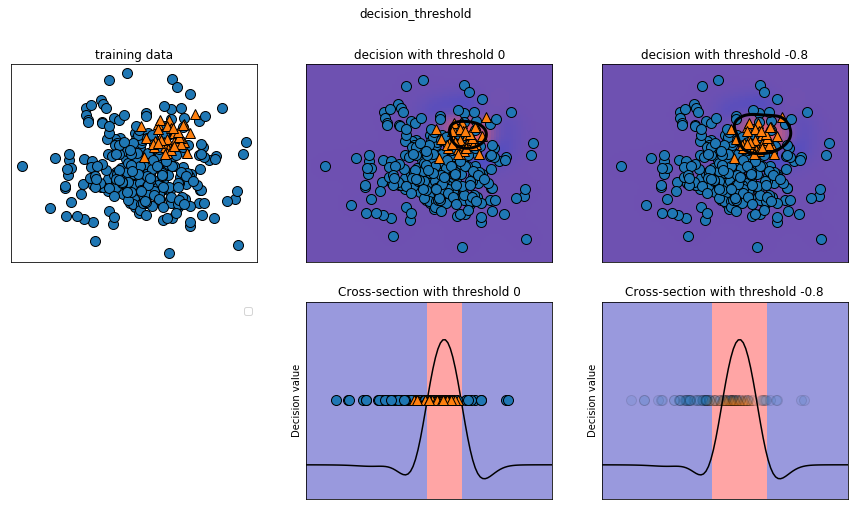

In [32]:
from mglearn.datasets import make_blobs 
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
svc = SVC(gamma=.05).fit(X_train, y_train)

mglearn.plots.plot_decision_threshold()

Heatmap of the decision function and the impact of changing the decision threshold


In [33]:
# We can use the classification_report function to evaluate precision and recall for both classes:
print(classification_report(y_test,svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



For class 1, we get a fairly small recall, and precision is mixed. Because class 0 is so much larger, the classifier focuses on getting class 0 right, and not the smaller class 1. 

Let’s assume in our application it is more important to have a high recall for class 1, as in the cancer screening example earlier. This means we are willing to risk more false positives (false class 1) in exchange for more true positives (which will increase the recall). The predictions generated by svc.predict really do not fulfill this requirement, but we can adjust the predictions to focus on a higher recall of class 1 by changing the decision threshold away from 0. By default, points with a deci sion_function value greater than 0 will be classified as class 1. We want more points to be classified as class 1, so we need to decrease the threshold:

In [34]:
y_pred_lower_threshold=svc.decision_function(X_test)>-.8

#look at the classification report for this problem
print(classification_report(y_test,y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



As expected, the recall of class 1 went up, and the precision went down. We are now classifying a larger region of space as class 1,  as illustrated in the top-right panel of above picture. If you value precision over recall or the other way around, or your data is heavily imbalanced, changing the decision threshold is the easiest way to obtain better results. As the decision_function can have arbitrary ranges, it is hard to provide a rule of thumb regarding how to pick a threshold.
    
    If you do set a threshold, you need to be careful not to do so using the test set. As with any other parameter, setting a decision threshold on the test set is likely to yield overly optimistic results. Use a 
    validation set or cross-validation instead.

Picking a threshold for models that implement the predict_proba method can be easier, as the output of predict_proba is on a fixed 0 to 1 scale, and models probabilities. By default, the threshold of 0.5 means that if the model is more than 50% “sure” that a point is of the positive class, it will be classified as such. Increasing the threshold means that the model needs to be more confident to make a positive decision (and less confident to make a negative decision). While working with probabilities may be more intuitive than working with arbitrary thresholds, not all models provide realistic models of uncertainty (a DecisionTree that is grown to its full depth is always 100% sure of its decisions, even though it might often be wrong). This relates to the concept of calibration: a calibrated model is a model that provides an accurate measure of its uncertainty.